# Capítulo 14. Regresión logítica


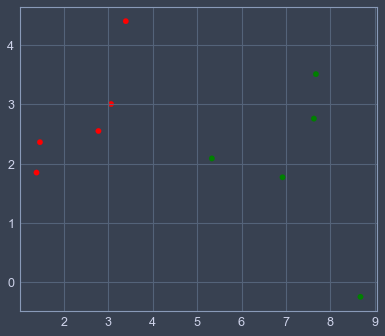

In [1]:
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

from numpy import array
from matplotlib import pyplot

#              X1           X2            Y
data = array([[2.7810836,   2.550537003,  0],
              [1.465489372, 2.362125076,  0],
              [3.396561688, 4.400293529,  0],
              [1.38807019,  1.850220317,  0],
              [3.06407232,  3.005305973,  0],
              [7.627531214, 2.759262235,  1],
              [5.332441248, 2.088626775,  1],
              [6.922596716, 1.77106367,   1],
              [8.675418651, -0.242068655, 1],
              [7.673756466, 3.508563011,  1]])

colors = ['red' if y == 0 else 'green' for y in data[:, 2]]
pyplot.scatter(data[:, 0], data[:, 1], color=colors)
pyplot.show()

In [2]:
from numpy import sqrt, zeros, ones, reshape, concatenate
from scipy.special import expit


class LogisticRegression:

    def __init__(self, data):
        self.X = self._generate_X(data)  # Dataset
        self.y = self._generate_y(data)  # Valores objetivo
        self.B = zeros(self.X.shape[1])  # Valores a descubir
        self.accuracy = 0. 

    def _generate_X(self, data):
        # Filas del dataset
        rows = data.shape[0]
        # Generamos la primera columna de 1s
        x1 = ones(rows)
        # Transformamos el vector en una matriz rows x 1
        x1 = reshape(x1, (rows, 1))
        # Seleccionamos todo el dataset menos la ultima columna y
        X = data[:, 0:-1]
        # Se añade al principio la columna de 1s
        X = concatenate((x1, X), axis=1)
        return X

    def _generate_y(self, data):
        return data[:, -1]

    def _epoch(self, alpha):
        for i in range(self.X.shape[0]):
            y_ = expit(self.X[i].dot(self.B))
            y = self.y[i]
            x = self.X[i]
            self.B = self.B + alpha * (y - y_) * y_ * (1 - y_) * x

    def _calculate_accuracy(self):
        "Calculate the accuracy"
        correct_predictions = 0;
        total_predictions = self.predicted_y.size
        
        for i in range(total_predictions):
            if self.predicted_y[i] >= 0.5 and self.y[i] == 1:
                correct_predictions += 1
            elif self.predicted_y[i] < 0.5 and self.y[i] == 0:
                correct_predictions += 1

        return correct_predictions / total_predictions * 100

    def fit(self, alpha, epochs):
        '''Fit by Stochastic Gradient Descent'''
        self.error = zeros(epochs)
        for i in range(epochs):
            self._epoch(alpha)
            self.predicted_y = self.predict(self.X)
            self.error[i] = self._calculate_accuracy()

        self.accuracy = self._calculate_accuracy()

    def predict(self, x):
        return expit(x.dot(self.B))
    
    def getLine(self):
        return expit(x.dot(self.B))

In [3]:
from scipy.special import expit

lr = LogisticRegression(data)
lr.fit(0.3, 10)
lr.accuracy

100.0

In [ ]:
pyplot.scatter(data[:, 0], data[:, 1], color=colors)
pyplot.plot(x, slr.predicted_y, color= 'red')
pyplot.show()

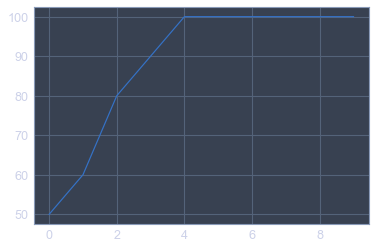

In [4]:
pyplot.plot(lr.error)
pyplot.show()